## Learning objectives 
 ##### about linear Regression 
 ##### types of regression 
 ##### regression model
 ##### performance metrices 
 ##### bias variance tradeoff
 ##### regularized regression 

### LINEAR REGRESSION 
 ##### used to study relationships b/w two varialbes particularly when one is dependent (DV which we want to predict) and the other independant (one or more, IV existing feature)
 #### Simple Regression
 #### Multiple Regression
 
 

### Regression case
looking to the existing data of different cars, can we estimate the approx. CO2 emission of a car, which is yet not manufactured

in the regression dependent value should be continuous and cannot be a discrete value. However, the independent value can be continuous or categorial

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn import linear_model

Read the .csv and load into DataFrame 

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


Let's explore the Data

In [4]:
print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB
None


         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
count   639.0   639.000000  639.000000        639.000000    639.000000
mean   2000.0     3.265728    5.805947         14.713615    296.809077
std       0.0     1.231012    1.625588          

Check the data column names

In [5]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

Let's pick the significant data columns 


In [6]:
df.columns
cdf=df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]  ### Selected appended and DataFrame create
cdf.head()



,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


Let's get some visualization from data

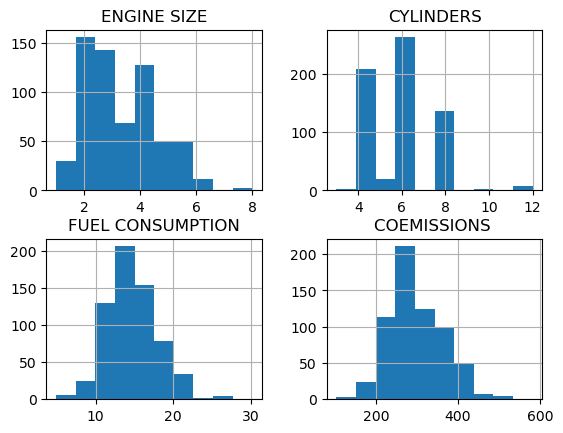

In [7]:
viz = cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION', 'COEMISSIONS ']]
viz.hist()
plt.show()

Get scatter plot between dependent and independent variables 

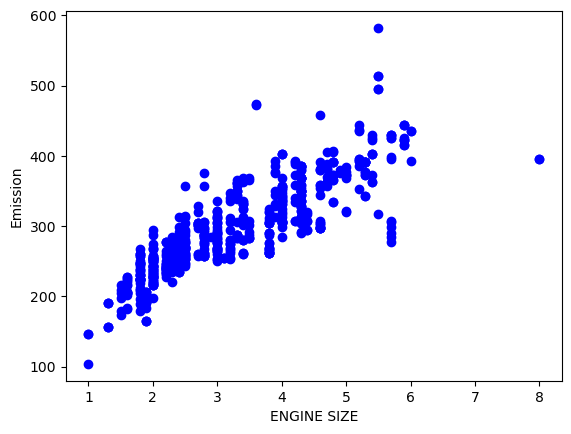

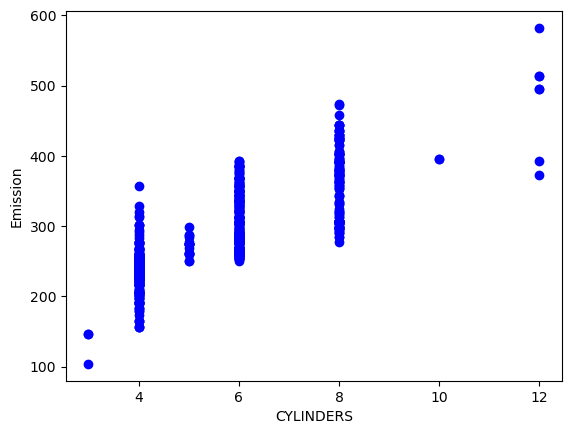

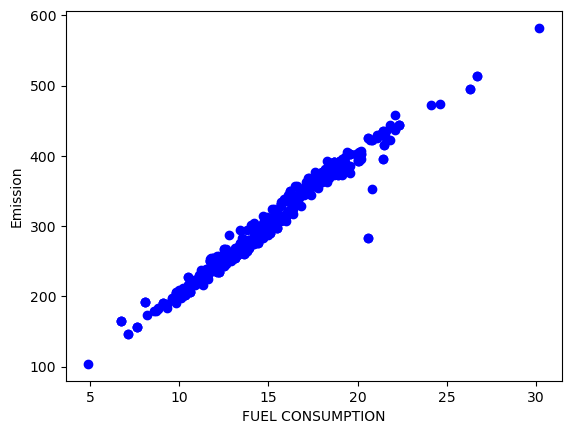

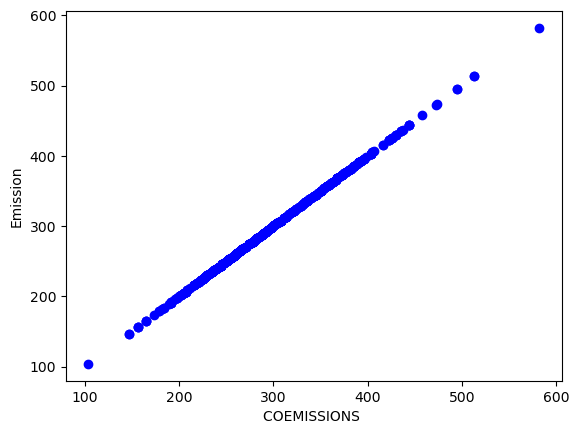

In [8]:
for i in cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(cdf[i],cdf['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()



#### In Simple Regression problem, the form of the model would be 
 ##### y = theta1 +theta2x
theta1 = intercept and theta2 = slope of the line 
where, y is DV or predicted value and x IV 

### Model error
Prediction line is not accurate. This error is also calld the residual error.
##### Types of model error 
Mean max error
Mean square error 
Root mean square 
R2 Score
Adjusted R2 score 
  R squared will always increase when a new predictor varaiable is added to the regression model 
  Regression model with a large dataset   

Create Train and Test data 


In [9]:
mask=np.random.rand(len(df)) < 0.80                   ### Uniform Random Number
train=cdf[mask]
test=cdf[~mask]



Let's check training data pattern

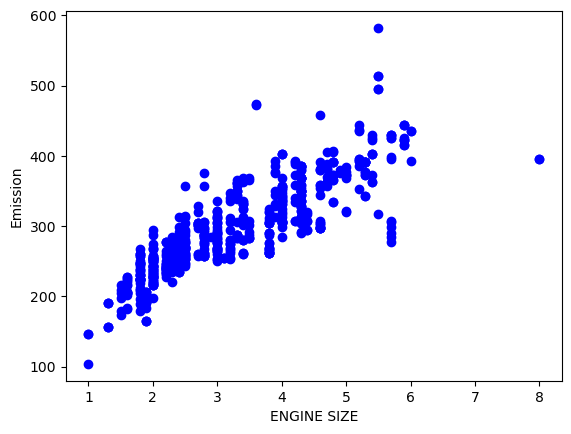

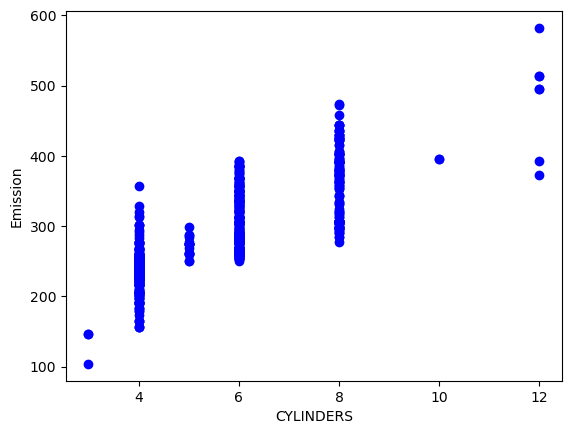

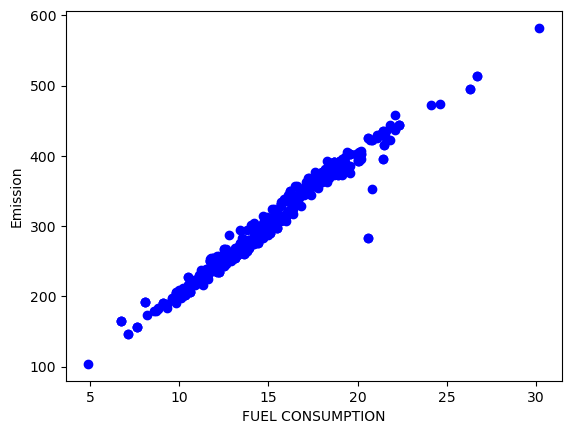

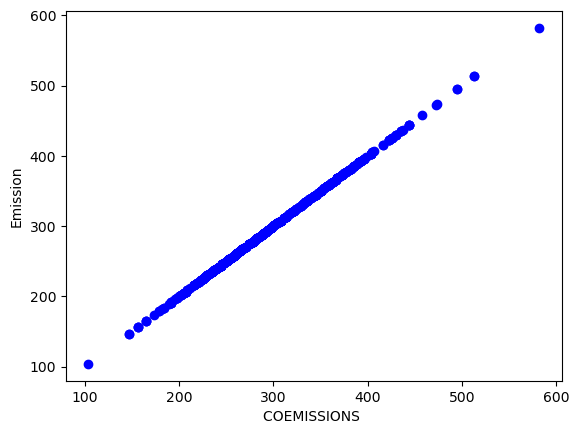

In [10]:
for i in cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(cdf[i],cdf['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()


Apply Linear Regression on Training Data 

In [11]:
coefficient=[]
intercept=[]
regress_model={}
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    regr=linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y=  np.asanyarray(train[['COEMISSIONS ']])
    regr.fit(train_x, train_y)
    regress_model[i]=regr
    print("Relation between {} & {}".format(i,"'COEMISSIONS'"))
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    
    print('\n')




Relation between ENGINE SIZE & 'COEMISSIONS'
Coefficients:  [[46.16244624]]
Intercept:  [146.27206919]


Relation between CYLINDERS & 'COEMISSIONS'
Coefficients:  [[32.64425964]]
Intercept:  [106.60345338]


Relation between FUEL CONSUMPTION & 'COEMISSIONS'
Coefficients:  [[19.38720393]]
Intercept:  [11.2241057]


Relation between COEMISSIONS  & 'COEMISSIONS'
Coefficients:  [[1.]]
Intercept:  [-1.13686838e-13]




use regression parameters to model linear equation

(515,)
(515,)


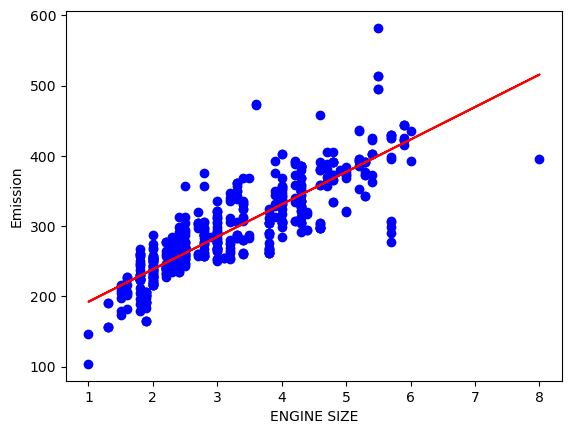

(515,)
(515,)


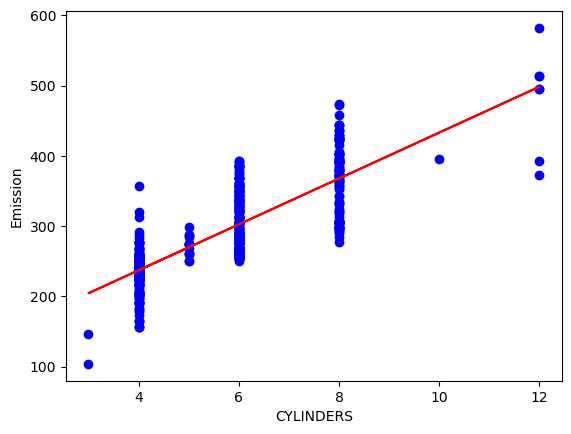

(515,)
(515,)


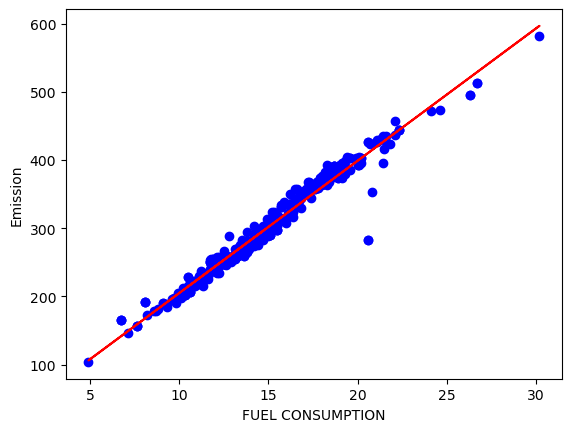

(515,)
(515,)


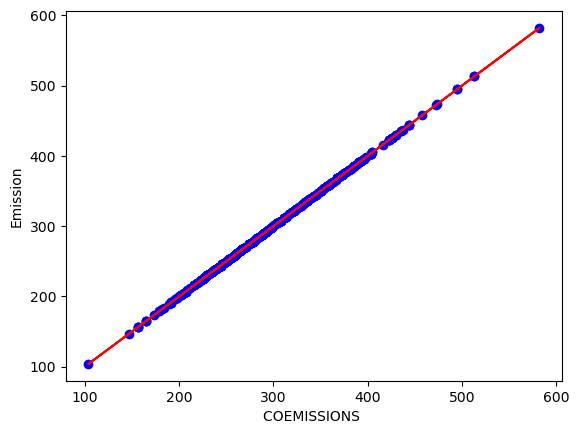

In [12]:
j=0
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i], train['COEMISSIONS '],  color='blue')
    x=train[i].values
    print(x.shape)
    y=coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l=len(y)
    y=np.reshape(y,(l,))
    plt.plot(x, y, '-r')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()
    j=j+1




Evaluate model performance on test data

In [13]:
from sklearn.metrics import r2_score

for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    test_x = np.asanyarray(test[[i]])
    test_y = np.asanyarray(test[['COEMISSIONS ']])
    test_y_ = regress_model[i].predict(test_x)
    print("Fitting Error between {} & {}".format(i,"'CO2EMISSIONS'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    print('\n')


Fitting Error between ENGINE SIZE & 'CO2EMISSIONS'
Mean absolute error: 23.56
Residual sum of squares (MSE): 1052.98
R2-score: 0.69


Fitting Error between CYLINDERS & 'CO2EMISSIONS'
Mean absolute error: 30.53
Residual sum of squares (MSE): 1506.86
R2-score: 0.42


Fitting Error between FUEL CONSUMPTION & 'CO2EMISSIONS'
Mean absolute error: 7.62
Residual sum of squares (MSE): 93.86
R2-score: 0.97


Fitting Error between COEMISSIONS  & 'CO2EMISSIONS'
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00




### Bias Variance Tradeoff
Fundamental concept in ML that describes the tradeoff between the error introduced by the bias and the variance in a model 

##### Bias 
refers to the error introduced by approximating the real world problem, which may be complex, by a simplified model 
##### Variance 
refers to the error introduced by tne model's sensitivity of small functions int the training dataset 
##### Tradeoff
there is a tradeoff between bias and variance such as increasing model complexity decreases bias but increases variance and vise versa

### Regularization Techniques 
##### Lasso Regression (L1) eliminates 
##### Ridge Regression (L2) optimizes non performing features 

## LOGISTIC REGRESSION (Classification model)

 In logistic regression, the goal is the probability that a given input (set of features x) belongs to a particular class. typically, this is  a binary classifiction problem where the classes are labeled as 0 and 1.

##### Learning Objective 

intro
Sigmoid Activation 
Training Process
Parameter Estimation 
Evaluation Matrices 
Concept of Cross Validation 

### Evaluation Matrices 

Confusion Matrix 
   from sklearn.metrices import confusion_matrix
   print(confusion_matrix(y_test,y_pred))
Accuracy Matrix = TP + TN / TP + FP + FN + TN
Precision, recall and F1 score (Harmonic mean of precision and recall) 

In [14]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define number of samples
num_samples = 100

# Generate synthetic data
carbon_emissions = np.random.uniform(50, 400, num_samples)  # Emissions in hypothetical units
energy_output = np.random.uniform(100, 1000, num_samples)   # Energy output in hypothetical units
renewability_index = np.random.uniform(0, 1, num_samples)   # Index from 0 (non-renewable) to 1 (fully renewable)
cost_efficiency = np.random.uniform(0.5, 5, num_samples)    # Cost efficiency score

# Generating a binary target variable based on a condition
# This is just an example: high renewability and low emissions favor sustainability
sustainability = [
    1 if (emission < 200 and renewability > 0.5 and cost < 3) else 0
    for emission, renewability, cost in zip(carbon_emissions, renewability_index, cost_efficiency)
]

# Create DataFrame
data = pd.DataFrame({
    'carbon_emissions': carbon_emissions,
    'energy_output': energy_output,
    'renewability_index': renewability_index,
    'cost_efficiency': cost_efficiency,
    'sustainability': sustainability
})

# Display the first few rows
print(data.head())

# Optionally, save to CSV for later use
data.to_csv('green_tech_data.csv', index=False)



   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [15]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
# Load the dataset
data = pd.read_csv('green_tech_data.csv')
# Inspect for missing values and general structure
print(data.head())
print(data.isnull().sum())


   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  
carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [17]:
# Handle missing values if necessary
data.fillna(data.mean(), inplace=True)


In [18]:
# Example feature selection
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']  # Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


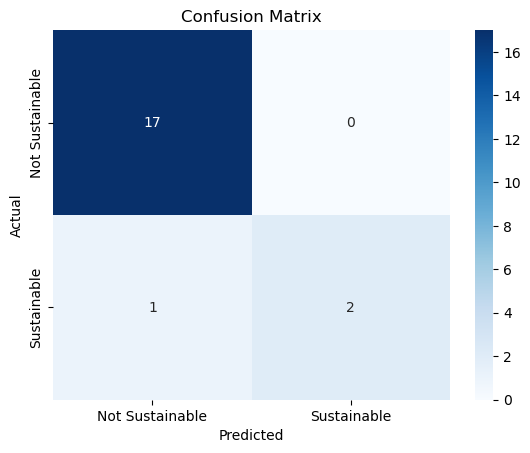

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sustainable', 'Sustainable'], 
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [21]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))


                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [22]:
# Feature importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)



                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [23]:
import joblib
# Save the model to a file
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']